# Enoncé
## Contexte
**Mon rôle** : civil participant à l'appel à projet

**Commanditaire** : jury de l’appel à projet (agence "Santé publique France")

**Activité de l'entreprise :** établissement public à caractère administratif français devant améliorer et protéger la santé des populations

**Projet :** applications en lien avec l'alimentation et la santé publique

**Type de Mission :** réponse d'un appel à projet

## Attendus
**But de la mission :** proposer une idée d'application en lien avec la nutrition

**Détails de la mission :** Le jeu de données Open Food Fact est disponible sur le site officiel : https://world.openfoodfacts.org/. 

Les variables sont définies à cette adresse : https://world.openfoodfacts.org/data/data-fields.txt

Les champs sont séparés en quatre sections :
- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

**Etapes demandées :**
Après avoir lu l’appel à projets, voici les différentes étapes que vous avez identifiées :

1) Traiter le jeu de données, en :

- Réfléchissant à une idée d’application.
- Repérant des variables pertinentes pour les traitements à venir, et nécessaires pour votre idée d’application.
- Nettoyant les données en :
- + mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées,
- - identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
- Automatisant ces traitements pour éviter de répéter ces opérations

/!\ Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple).

**2) Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.**

**/!\ L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.**

**3) Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.**

**4) Justifier votre idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.**

**5) Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.**

**Script concerné :** Un notebook d’exploration comportant une *analyse univariée, multivariée, une réduction dimensionnelle*, ainsi que les *différentes questions de recherches associées* (non cleané, pour comprendre votre démarche).

# Explications

Même s'il est de plus en plus répandu, le nutriscore n'est pas encore obligatoire en France. Il ne s'applique pour le moment qu'à des produits emballés :
- fruits et légumes frais
- viandes crues découpées
- miel
- ...
ne sont pas concernés par le nutriscore. L'alcool à plus de 1.2% n'est pas non plus considéré dans le nutriscore. 

De plus, les plats préparés peuvent avoir 2 nutriscores :
- un pour le plat
- un pour la sauce.

## Calcul du nutriscore
D'après le site http://alimentsmag.fr/comment-est-calcule-le-nutri-score/, voici les informations utiles pour la compréhension du nutriscore. 

Le nutriscore est calculé en soustrayant :
- la note N ==> des nutriments à dévaloriser (les calories, les acides gras saturés - graisse -, les sucres simples, le sodium - sel-) &
- la note P ==> des composantes à valoriser (les fruits, légumes, légumineuses, fruits à coques, les fibres et les protéines)

Ce calcul est différent pour certaines catégories de produits :
- les fromages, 
- les matières grasses végétales ou animales et 
- les boissons

Il est adapté en fonction de leurs particularités :
- pour les fromages ==> la teneur en protéines,
- pour les matières grasses ==> la rapport Acides Gras Saturés / Lipides Totaux,
- pour les boissons ==> les sucres totaux et les fruits et légumes.

## Hypothèses

Je vais ici essayer de justifier le fait que l'on puisse estimer le score et la classe du nutriscore en fonction des informations renseignées que sont :
- la catégorie du produit,
- les calories,
- les acides gras saturé,
- les sucres,
- le sodium,
- les fruits/légumes/fruits à coque,
- les fibres,
- les protéines.

De plus, les variables calories, acides gras saturés, surcres et sodium influent positivement sur le nutriscore (plus leur valeur est élevé, plus le nutriscore augmente ; ainsi plus ses nutriments sont important, plus le produit est mal noté). Alors que les fruits/légumes/fruits à coque, les fibres et les protéines influent négativement sur le nutriscore (plus leur valeur sont élevé, plus le nutriscore diminue ; ainsi plus ses nutriments sont important, plus le produit est bien noté).

# Importations
## Librairies et paramétrages

In [1]:
# Gestion des données
import pandas as pd
import numpy as np
from collections import Counter

# Gestion des graphiques
import matplotlib.pyplot as plt
import seaborn as sns

# Statistiques
from statistics import multimode
from scipy.stats import pearsonr, iqr
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.utils import resample
from functions import *

# Gestion des URL et affichage des images
from PIL import Image
import requests
from io import BytesIO

# Format des résultats affichés
pd.set_option('display.max_columns', None) # display.max_columns : contrôle le nombre de colonnes à imprimer (int ou None pour imprimer toutes les colonnes)
pd.set_option('max_colwidth', 50) # Vous pouvez augmenter la largeur en passant un int (ou mettre au max en passant None)
pd.set_option("max_rows", None) # Pour modifier le nombre de lignes, vous devez modifier l' option max_rows 
pd.options.display.float_format = '{:.2f}'.format # enlève le format d'affichage : nombre scientifique

# Pour afficher les graphiques dans la continuité du code, et non pas dans une fenêtre à part:
%matplotlib inline

## Jeu de données

In [2]:
df = pd.read_csv("E:/Formations/6. Diplôme Data Scientist/Projet/Projet-3/fr_openfoodfacts_org_products_clean.csv"
                 , sep=",", low_memory=False, encoding="utf-8") #, nrows= 1000

In [3]:
# liste des colonnes
listCol = df.columns.tolist()
listCol

['code',
 'created_datetime',
 'last_modified_datetime',
 'product_name',
 'image_small_url',
 'other_countries',
 'pnns_groups_1',
 'pnns_groups_2',
 'nova_group',
 'nova_desc',
 'nutriscore_100g',
 'nutriscore_grade',
 'energy-kcal_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'sodium_100g',
 'fiber_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

In [4]:
# liste des nutriments
listeColNutriment = [x for x in listCol if (x.endswith('_100g')) & (not(x.startswith('nutri')) == True)]
listeColNutriment

['energy-kcal_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'sodium_100g',
 'fiber_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g']

In [5]:
# liste des groupes de nutriscore
listGrade = [x for x in df['nutriscore_grade'].drop_duplicates().sort_values().tolist() if not x is np.nan]
listGrade

['a', 'b', 'c', 'd', 'e']

In [6]:
# liste catégorie
listCat1 = df['pnns_groups_1'].unique()
listCat1

array(['FAT AND SAUCES', 'COMPOSITE FOODS', 'SUGARY SNACKS',
       'CEREALS AND POTATOES', 'FISH MEAT EGGS',
       'MILK AND DAIRY PRODUCTS', 'FRUITS AND VEGETABLES', 'SALTY SNACKS'],
      dtype=object)

### Vérifications

In [7]:
# 10 lignes au hasard
df.sample(10)

,code,created_datetime,last_modified_datetime,product_name,image_small_url,other_countries,pnns_groups_1,pnns_groups_2,nova_group,nova_desc,nutriscore_100g,nutriscore_grade,energy-kcal_100g,saturated-fat_100g,sugars_100g,sodium_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g
51863,3282073157011,2013-05-08 17:24:29,2014-09-26 06:09:01,Matines gros oeufs frais,https://images.openfoodfacts.org/images/produc...,Aucun,FISH MEAT EGGS,EGGS,0.00,Inconnu,NaN,NaN,141.64,2.38,0.43,0.29,0.12,12.60,0.09
33925,3250391330485,2018-01-10 17:49:15,2021-03-05 20:26:26,Saucisses de Toulouse,https://images.openfoodfacts.org/images/produc...,Aucun,FISH MEAT EGGS,PROCESSED MEAT,4.00,Produits alimentaires et boissons ultra-transf...,18.00,d,243.00,7.40,0.50,0.74,0.47,15.00,0.00
34435,3250391678136,2016-09-15 14:06:31,2021-02-09 15:32:44,Mon filet de dinde doré au four ( 6 tranches),https://images.openfoodfacts.org/images/produc...,Aucun,FISH MEAT EGGS,PROCESSED MEAT,4.00,Produits alimentaires et boissons ultra-transf...,3.00,c,101.00,0.50,1.10,0.67,0.00,21.70,0.00
35294,3250392404062,2018-07-23 15:44:58,2020-02-23 08:00:20,Pommes Duchesses,https://images.openfoodfacts.org/images/produc...,Aucun,CEREALS AND POTATOES,POTATOES,0.00,Inconnu,9.00,c,180.00,5.80,2.50,0.28,2.86,2.70,1.10
69221,3456700070022,2016-09-26 19:36:28,2021-09-02 17:36:20,Tielles de Sète,https://images.openfoodfacts.org/images/produc...,Aucun,SALTY SNACKS,APPETIZERS,3.00,Aliments transformés,4.00,c,278.00,1.50,3.60,0.52,3.35,8.50,0.00
53489,3292590841362,2018-03-02 09:05:50,2019-03-22 08:47:59,Filets de sardine,https://images.openfoodfacts.org/images/produc...,Aucun,FISH MEAT EGGS,FISH AND SEAFOOD,0.00,Inconnu,11.00,d,253.00,8.60,0.01,0.01,0.88,18.00,3.48
13556,2454652027553,2018-10-11 17:17:15,2021-07-11 10:43:57,Jambon cuit et rôti,https://images.openfoodfacts.org/images/produc...,Aucun,FISH MEAT EGGS,PROCESSED MEAT,4.00,Produits alimentaires et boissons ultra-transf...,12.00,d,127.00,1.40,0.90,0.92,0.47,22.30,0.00
120110,8714100998984,2018-07-08 10:40:20,2020-08-30 09:41:21,Sauce gourmet burger aux oignons caramélisés,https://images.openfoodfacts.org/images/produc...,Aucun,FAT AND SAUCES,DRESSINGS AND SAUCES,0.00,Inconnu,15.00,d,382.00,3.10,5.10,0.68,1.46,1.30,10.07
46454,3266980934262,2018-01-01 21:20:46,2021-03-06 18:15:38,L'Escalope Cordon Bleu Reblochon,https://images.openfoodfacts.org/images/produc...,Aucun,COMPOSITE FOODS,ONE DISH MEALS,4.00,Produits alimentaires et boissons ultra-transf...,3.00,c,259.00,3.70,1.40,0.44,2.40,14.00,0.00
106206,5420058005379,2018-09-16 17:53:26,2019-09-05 10:04:32,Mayonnaise artisanale,https://images.openfoodfacts.org/images/produc...,Aucun,FAT AND SAUCES,DRESSINGS AND SAUCES,0.00,Inconnu,16.00,d,688.00,4.50,0.00,0.40,1.46,1.40,10.07


In [8]:
print ("Le dataset compte {:,} lignes et {} variables".format(df.shape[0], df.shape[1]).replace(",", " "))

Le dataset compte 122 026 lignes et 19 variables


# Analyse univariée
## Statistiques générales

In [9]:
df.describe()

,nova_group,nutriscore_100g,energy-kcal_100g,saturated-fat_100g,sugars_100g,sodium_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g
count,122026.00,111274.00,122026.00,122026.00,122026.00,122026.00,122026.00,122026.00,122026.00
mean,2.03,7.25,224.53,3.71,4.56,0.52,2.01,9.56,5.62
std,1.83,7.98,133.54,4.58,7.16,0.71,2.63,7.63,11.26
min,0.00,-13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,121.00,0.60,0.60,0.08,0.47,3.55,0.00
50%,3.00,5.00,209.00,2.10,2.00,0.40,1.46,7.90,0.38
75%,4.00,14.00,308.00,4.70,4.53,0.63,2.53,13.00,6.50
max,4.00,40.00,900.00,76.00,100.00,25.20,90.40,92.00,100.00


On remarque les variables nutriments qui ont toutes la même unité (sauf le sodium qui est en mg) ont des valeurs relativements petites pour 100g de produits : 75% des données sont inférieur à 15g de nutriments pour 100g de produits.

A première vue, les moyennes et médianes des variables nutriments ne sont pas similaire. Regardons d'un peu plus près.

### Comparaison moyenne et médiane

In [10]:
df_stat = pd.DataFrame(df[listeColNutriment].mean(), index = df[listeColNutriment].mean().index, columns = ['moyenne'])
df_stat['médiane'] = df[listeColNutriment].median()
df_stat

,moyenne,médiane
energy-kcal_100g,224.53,209.00
saturated-fat_100g,3.71,2.10
sugars_100g,4.56,2.00
sodium_100g,0.52,0.40
fiber_100g,2.01,1.46
proteins_100g,9.56,7.90
fruits-vegetables-nuts_100g,5.62,0.38


Aucun nutriment n'a de moyenne et médiane égales. Par conséquent, ces variables là ne sont pas symétrique et ne suivent pas une loi normale. De plus, on peut émettre l'hypothèse qu'elles ont toutes une asymétrie vers la droite. Rajoutons un test de normalité pour vérifier.

In [11]:
df_stat['skewness'] = df[listeColNutriment].skew()
df_stat

,moyenne,médiane,skewness
energy-kcal_100g,224.53,209.00,0.91
saturated-fat_100g,3.71,2.10,2.26
sugars_100g,4.56,2.00,3.02
sodium_100g,0.52,0.40,6.04
fiber_100g,2.01,1.46,7.51
proteins_100g,9.56,7.90,1.33
fruits-vegetables-nuts_100g,5.62,0.38,3.54


Tous les résultats sont supérieurs à 0. Cela valide l'hypothèse que les distributions des nutriments ne suivent pas une loi normale et que les distributions sont étalées vers la droite. La plupart des variables sont mêmes suprérieur à 1 ce qui indique qu'elles sont fortement asymétrique.

## Représentation des nutriments

---- energy-kcal_100g ----


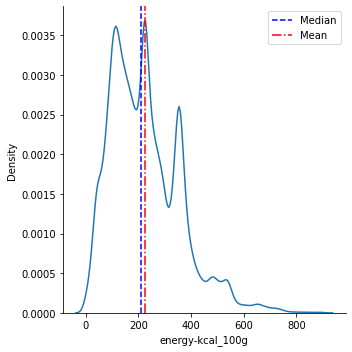

---- saturated-fat_100g ----


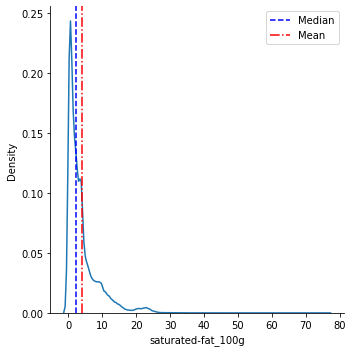

---- sugars_100g ----


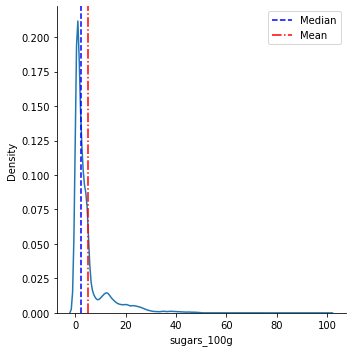

---- sodium_100g ----


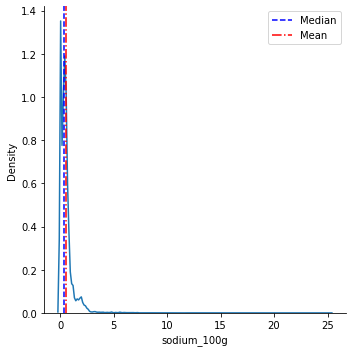

---- fiber_100g ----


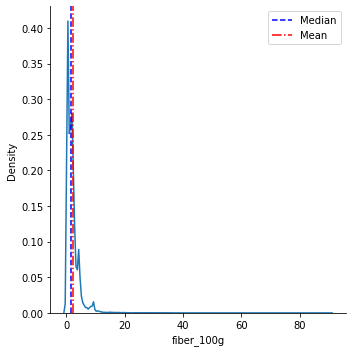

---- proteins_100g ----


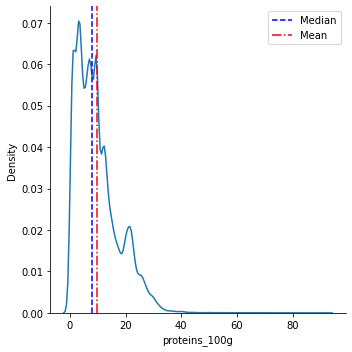

---- fruits-vegetables-nuts_100g ----


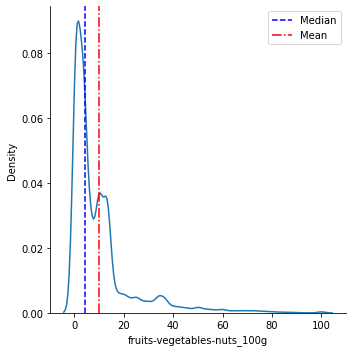

In [12]:
for col in listeColNutriment:
    print("----", col, "----")
    df_temp = df[df[col]>0]
    sns.displot(df_temp[col], kind="kde")
    plt.axvline(np.median(df_temp[col]),color='b', linestyle='--', label="Median")
    plt.axvline(np.mean(df_temp[col]),color='r', linestyle='-.', label="Mean")
    plt.legend()
    plt.show();

On remarque que, même si les moyennes et médianes ne sont pas égales, elles sont presques toujours très rapprochées.

## Représentation des catégories

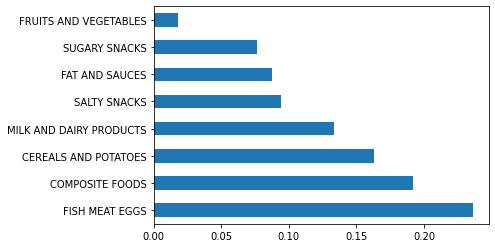

In [13]:
df["pnns_groups_1"].value_counts(normalize=True).plot(kind='barh')
plt.show()

On peut voir que certaines catégories de produits sont beaucoup plus représentées que d'autres : les poissons/viandes/oeufs et plats préparés, près d'un quart du jeu de données.

Je vais garder à l'esprit que ma distribution n'est pas bien répartie entre les différentes catégories de produit. En effet, cela pourra impacter mes résultats lors de l'analyse du lien entre la catégorie du produit et le nutriscore.

## Représentation des nutriscores

Nutriscore - score


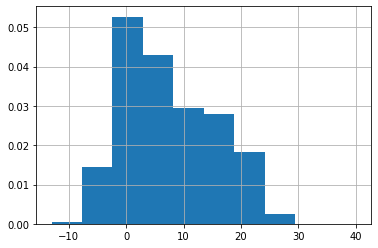

Nutriscore - classe


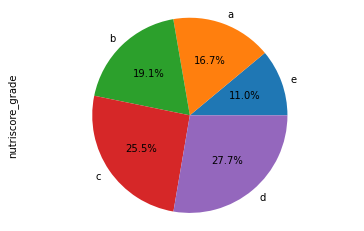

In [14]:
print("Nutriscore - score")
df["nutriscore_100g"].hist(density=True)
plt.show();
print("Nutriscore - classe")
df["nutriscore_grade"].value_counts(normalize=True).sort_values().plot(kind='pie',autopct='%1.1f%%',textprops=dict(color="black",size=10))
plt.axis('equal') 
plt.show();

Il n'y a pas vraiment de tendance ici, les très très bon et très très mauvais nutriscore ne sont pas beaucoup représentés. Il y a surtout des nutriscores moyens (C/D).

# Analyse bivariée

Commençons par regarder la répartition des classes de nutriscore par rapport aux catégorie de produit pour voir si un lien apparait. 

## Associations nutriscore grade et catégorie

In [15]:
pd.crosstab(index = df['nutriscore_grade']
                , columns = df['pnns_groups_1']
                , normalize = True
                , margins = True
                , margins_name = "Total")

pnns_groups_1,CEREALS AND POTATOES,COMPOSITE FOODS,FAT AND SAUCES,FISH MEAT EGGS,FRUITS AND VEGETABLES,MILK AND DAIRY PRODUCTS,SALTY SNACKS,SUGARY SNACKS,Total
nutriscore_grade,,,,,,,,,
a,0.09,0.03,0.00,0.02,0.00,0.02,0.00,0.00,0.17
b,0.04,0.06,0.01,0.02,0.01,0.04,0.01,0.01,0.19
c,0.02,0.06,0.02,0.05,0.01,0.05,0.02,0.02,0.26
d,0.01,0.04,0.04,0.09,0.00,0.02,0.04,0.03,0.28
e,0.00,0.00,0.01,0.06,0.00,0.00,0.03,0.01,0.11
Total,0.16,0.20,0.08,0.25,0.02,0.14,0.10,0.06,1.00


Il y a une certaines tendances générales : certaines catégories sont majoritairement mieux notées que d'autres. On peut voir que les catégories de produits les moins biens notées en général sont : les poissons/viandes/oeufs, suivi des collations salées.

Cela va dans le sens de mon hypothèse de départ : la catégorie du produit fait parti des facteurs déterminant du nutriscore. 

In [16]:
X = "pnns_groups_1" # qualitative
Y = "nutriscore_100g" # quantitative

sous_echantillon = df[~df["nutriscore_100g"].isna()]

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = np.sum([(yj-moyenne_y)**2 for yj in y]) # variation totale
    SCE = np.sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # variation interclasse
    return SCE/SCT
    
print("Résultat de la corrélation : {:.2f}".format(eta_squared(sous_echantillon[X],sous_echantillon[Y])))

Résultat de la corrélation : 0.31


Le résultat indique que les moyennes par classe sont légèrement différentes : il existe donc a priori une relation entre le nutriscore et la catégorie du produit.

## Associations entre les nutriscore grade et les nutriments

energy-kcal_100g


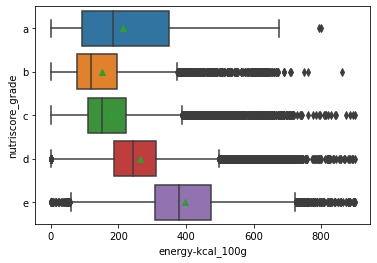

saturated-fat_100g


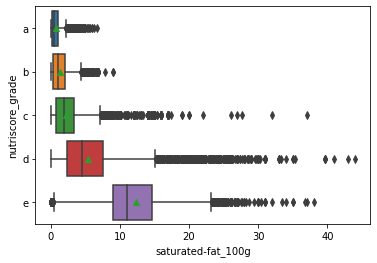

sugars_100g


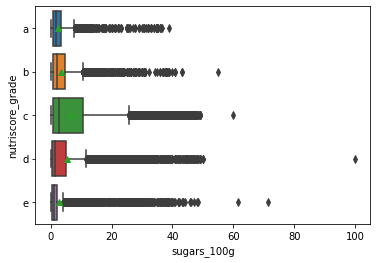

sodium_100g


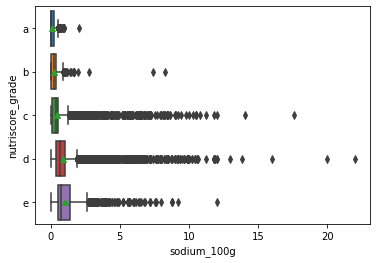

fiber_100g


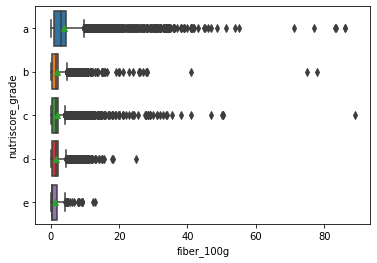

proteins_100g


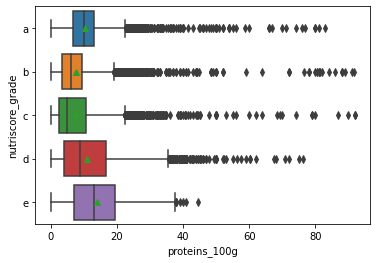

fruits-vegetables-nuts_100g


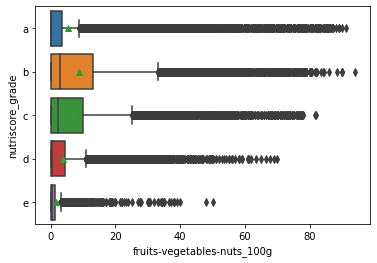

In [17]:
for col in listeColNutriment:
    print(col)
    sns.boxplot(data = df, x = col, y = 'nutriscore_grade', order = listGrade, showmeans = True)
    plt.show()

On remarque une certaine tendance générale :
- les calories, les acides gras saturé et le sodium ont des distributions qui tendent à se déplasser vers de grandes valeurs à mesure que les classes augment
- les fibres et les fruits/légumes/fruits à coque ont des distributions qui tendent à se déplasser vers de petites valeurs à mesure que les classes augment.

Cela va dans le sens de mes hypothèses de départ.

Seul 2 variables ne justifient pas les hypothèses de départ :
- le sucre forme une cloche, les distributions tendant à se déplasser vers de grandes valeurs à mesure que les classes augmentent jusqu'à la classe C, puis les distributions tendent vers de petites valeurs à mesure que les classes augmentent jusqu'à la classe E
- les protéines ont une tendance qui va à l'encontre de l'hypothèse de départ : plus les classes augmentent, plus les distributions tendent vers de grandes valeurs. 

De plus, on peut voir que toutes les variables nutriments ont des outliers pour toutes les catégories de produits. En vérité, cela est surement dû au fait que ce sont des distributions bimodales ou plurimodale. Regardons les données sous une autre forme.

energy-kcal_100g


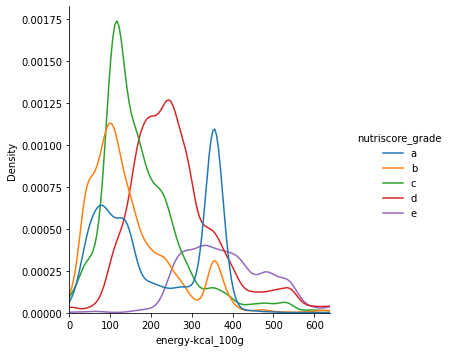

saturated-fat_100g


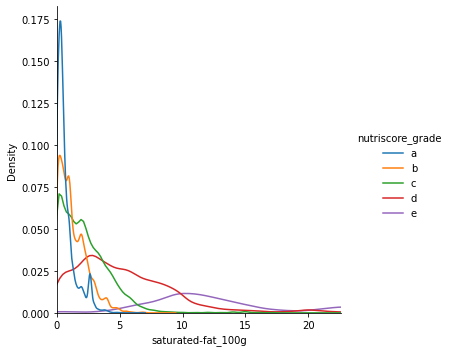

sugars_100g


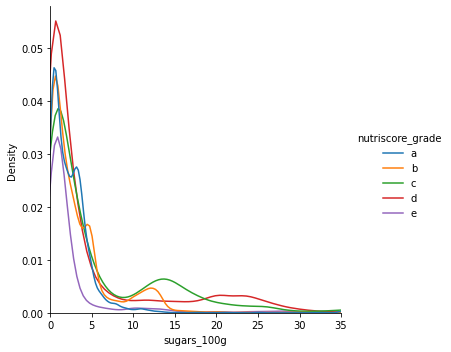

sodium_100g


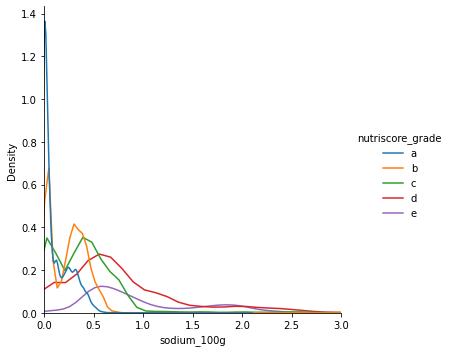

fiber_100g


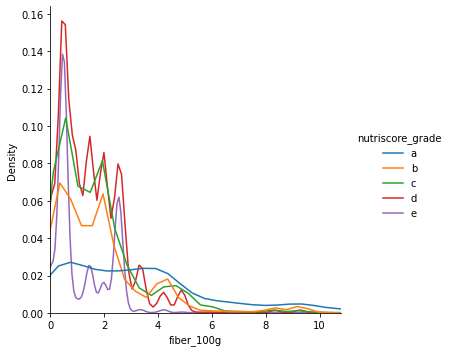

proteins_100g


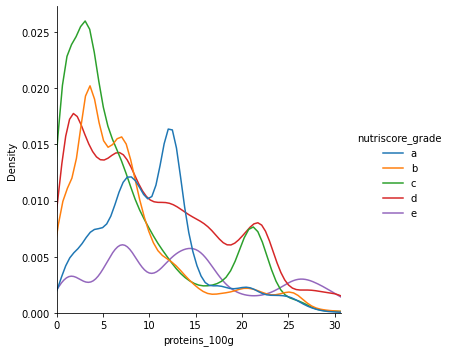

fruits-vegetables-nuts_100g


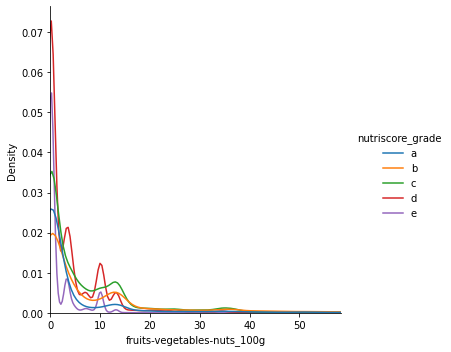

In [18]:
for col in listeColNutriment:
    print(col)
    sns.displot(data = df, x = col, hue = 'nutriscore_grade', kind="kde", hue_order = listGrade)
    plt.xlim(df[col].min(), np.nanpercentile(df[col],99))
    plt.show()

Pour les calories, les acides gras saturé et le sodium, à mesure que les courbes des classes tendent à se déplacer vers la droite à mesure que la note augmente : la tendance générale est que plus les valeurs de ses variables sont élevées, plus le nutriscore est mal noté.
Alors que pour les fibres, plus les valeurs sont faibles, plus la note est meilleure.
Les glucides, les protéines et surtout les fruits/légumes/fruits à coques, aucune tendance ne se distingue si ce n'est que les courbes se superposent.

## Associations entre le nutriscore et les nutriments

In [19]:
listColCorr = listeColNutriment.copy()
listColCorr.insert(len(listColCorr)+1,'nutriscore_100g')
listColCorr

['energy-kcal_100g',
 'saturated-fat_100g',
 'sugars_100g',
 'sodium_100g',
 'fiber_100g',
 'proteins_100g',
 'fruits-vegetables-nuts_100g',
 'nutriscore_100g']

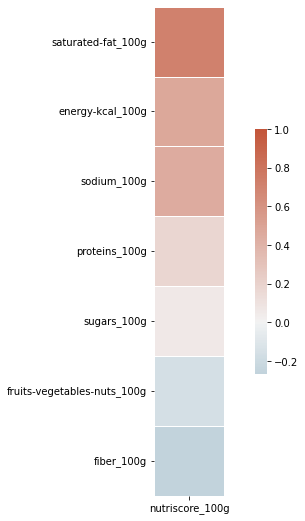

In [20]:
# Compute the correlation matrix
corr = df[listColCorr].corr()
corr = corr.iloc[:-1,-1:].copy()
corr = corr.sort_values(by = corr.columns.tolist()[0], ascending = False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# ajuste le masque et df 
mask[:, :-1] = False
mask[-1:, -1:] = False

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Avec ce premier test de corrélation, on peut voir que le nutriscore est :
- positivement corrélé avec les acides gras saturé, les calories, le sodium - sel - et le sucre.
- négativement corrélé avec les fibres et les fruits/légumes/fruits à coques.

Cela rejoint globalement les informations trouvés pendant mes recherches : 
- plus les composantes négatives (variables positivement corrélées) augmentent, plus le nutriscore augmente
- plus les composantes positives (variables négativement corrélées) augmentent, plus le nutriscore diminue.

En revanche, la variable protéines va à l'inverse des informations du calcul du nutriscore. Il est légérement corrélé avec le nutriscore, mais positivement alors qu'il devrait l'être négativement.

Regardons si son lien avec le nutriscore dépend de la catégorie du produit.

Avant de calculer les corrélations entre le score du nutriscore et les nutriments pour chaque catégorie de produit, je vais m'assurer que chaque catégorie de produit sont uniformément réparties en les échantillonnant.

In [21]:
# catégorie la moins représentée dans le dataset
catMin = str(df['pnns_groups_1'].value_counts().iloc[-1:].index.to_list()).replace("[","").replace("]","").replace("'","")
valMin = int(df['pnns_groups_1'].value_counts().iloc[-1:].values)

# je récupère uniquement les lignes de la catégorie la moins représentée dans le dataset
df_distr = df[df['pnns_groups_1'] == catMin]

# liste des catégories de produit sauf la moins représentée
listCatMoins = [x for x in listCat1 if x != catMin]

# puis je rajoute aléatoirement autant de ligne pour chaque autre catégorie
i = 30
for cat in listCatMoins:
    i += 1
    df1 = df[df['pnns_groups_1'] == cat]
    df_distr = pd.concat([df_distr,resample(df1, n_samples = valMin, random_state = i, replace=False)], ignore_index = True)
    
df_distr['pnns_groups_1'].value_counts()

FRUITS AND VEGETABLES      2167
FAT AND SAUCES             2167
COMPOSITE FOODS            2167
SUGARY SNACKS              2167
CEREALS AND POTATOES       2167
FISH MEAT EGGS             2167
MILK AND DAIRY PRODUCTS    2167
SALTY SNACKS               2167
Name: pnns_groups_1, dtype: int64

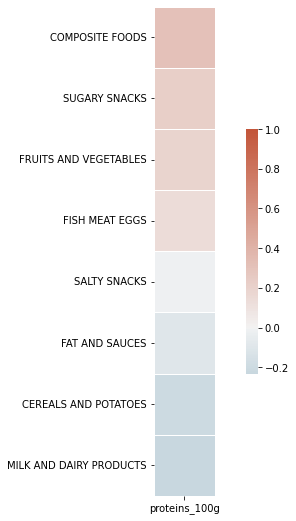

In [22]:
i = 1
for cat in listCat1:
    df_temp = df_distr[df_distr['pnns_groups_1'] == cat]
    if cat == listCat1[0]:
        df_corr = df_temp[listColCorr].corr()[-1:]
    else:
        df_corr = df_corr.append(df_temp[listColCorr].corr()[-1:])
    if i == 1:
        df_corr.index = [listCat1[i]]
    else:
        df_corr.index = listCat1[:i]
    i += 1

listColDrop = [x for x in listColCorr if x != 'proteins_100g']
df_corr = df_corr.drop(columns = listColDrop)
df_corr = df_corr.sort_values('proteins_100g', ascending = False)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Cela confirme mon hypothèse selon laquelle, la catégorie du produit a une influence sur le nutriscore. En effet, lorsque le produit est un plat préparé, collation sucrée, fruit/légume ou poisson/viande/oeuf, les protéines font augmenter le nutriscore, et inversement. 

En revanche, lorsque les collations salées, les graisses et sauces, lait et produits laitiers, céréales et pommes de terre, les protéines font diminuer le nutriscore et inversement.

# Analyse multivariée
## Analyse descriptive : ACP
connaitre les  coeff de chaque nutriment ?

Réduire les données en plus de les centrées est ici nécessaire, car les calories sont dans une unité différente des variables nutriments et dans ces variables nutriments, le sodium n'a pas les mêmes ordres de grandeur que les autres nutriments.

Le premier plan factoriel couvrira une inertie de 45.37% et le second plan : 74.88%.


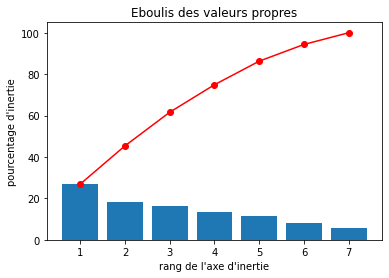

In [23]:
# choix du nombre de composantes à calculer
n_comp = len(listeColNutriment)

# selection des colonnes à prendre en compte dans l'ACP
data_pca = df[listeColNutriment]
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.median()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
features = data_pca.columns.str.replace('_100g','')

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components= n_comp)
pca.fit(X_scaled)

varexpl = pca.explained_variance_ratio_*100
print("Le premier plan factoriel couvrira une inertie de {:.2f}% et le second plan : {:.2f}%.".format(varexpl[0:2].sum(),varexpl[0:4].sum()))

# Eboulis des valeurs propres
display_scree_plot(pca)

Le 1er plan, à lui seul, n'expliquant même pas la moitié des données. Je vais par conséquent analyser les 2 premiers plans factoriels.

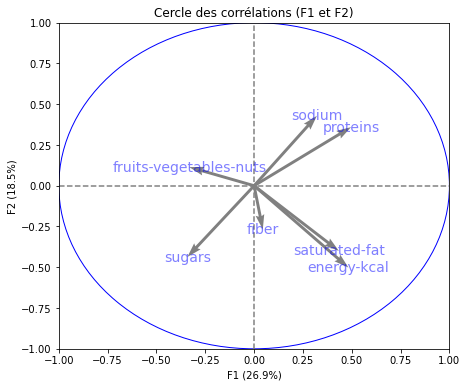

In [24]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

Alors que le 1er axe factoriel, semble indiquer le niveau calorique/gras ou végétale (fruits et légumes) du produit, le 2ème axe, lui, porte l'information sur le côté salé/sucré du produit.

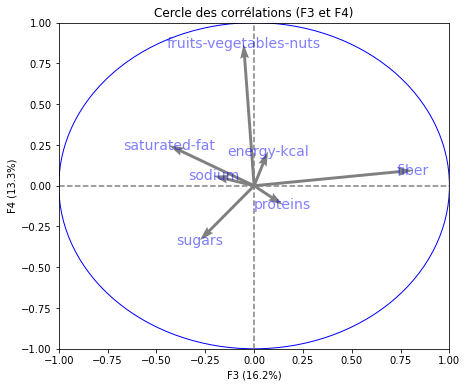

In [25]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))

Ce 2ème plan factoriel nous donne a peu près les mêmes indications. Le 3ème axe factoriel indique le niveau de sain du produit par une distinction entre les fibres d'un côté et les acides gras saturé de l'autre. Le 4ème plan fatoriel, lui, indique aussi le caractère sain d'un produit mais du côté des fruits/légumes/fruits à coque et des produits sucrés.

## Analyse explicative : ANOVA

Comme vu précédement, la catégorie du produit a une influence sur le nutriscore et fait notemment varier les résultats sur les protéines. Je vais donc récupérer l'échantillonage par catégorie de produit pour effectuer mon analyse ANOVA dessus.

In [26]:
for col in listeColNutriment:
    X = "nutriscore_grade" # qualitative
    Y = col # quantitative

    sous_echantillon = df_distr[(~df_distr[X].isnull())&(~df_distr[Y].isnull())]

    def eta_squared(x,y):
        moyenne_y = y.mean()
        classes = []
        for classe in x.unique():
            yi_classe = y[x==classe]
            classes.append({'ni': len(yi_classe),
                            'moyenne_classe': yi_classe.mean()})
        SCT = np.sum([(yj-moyenne_y)**2 for yj in y]) # variation totale
        SCE = np.sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # variation interclasse
        return SCE/SCT

    res = eta_squared(sous_echantillon[X],sous_echantillon[Y])

    print("Le résultat du test entre {} et {} est de {}.".format(X, Y, res.round(2)))

Le résultat du test entre nutriscore_grade et energy-kcal_100g est de 0.33.
Le résultat du test entre nutriscore_grade et saturated-fat_100g est de 0.53.
Le résultat du test entre nutriscore_grade et sugars_100g est de 0.06.
Le résultat du test entre nutriscore_grade et sodium_100g est de 0.15.
Le résultat du test entre nutriscore_grade et fiber_100g est de 0.09.
Le résultat du test entre nutriscore_grade et proteins_100g est de 0.07.
Le résultat du test entre nutriscore_grade et fruits-vegetables-nuts_100g est de 0.09.


On peut voir qu'il n'y a pas de relation entre le nutriscore et les fruits/légumes/fruits à coque, les protéines, les glucides. Il y en revanche un lien très fort entre le nutriscore et les acides gras saturés et un peu moins, respectivement, avec les calories, le sodium et les fibres. 

## Estimation du grade en fonction du score

In [27]:
pd.crosstab(df['nutriscore_grade']
            , df['nutriscore_100g'])

nutriscore_100g,-13.00,-12.00,-11.00,-10.00,-9.00,-8.00,-7.00,-6.00,-5.00,-4.00,-3.00,-2.00,-1.00,0.00,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,25.00,26.00,27.00,28.00,29.00,30.00,31.00,40.00
nutriscore_grade,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
a,1,12,23,18,42,105,270,1498,1551,2741,2419,3076,6797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,0,0,0,0,1,0,7142,6547,7525,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7915,6511,5273,2498,1817,1375,1477,1540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,6,0,0,4960,4653,4753,4361,3164,3150,2897,2861,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6,1,4,6,6,8,2770,2639,2387,1166,762,1087,1130,251,31,12,6,7,1,1


# Evaluation
## Compétences évaluées

- Effectuer une analyse statistique multivariée
- Communiquer ses résultats à l’aide de représentations graphiques lisibles et pertinentes
- Effectuer une analyse statistique univariée
- Effectuer des opérations de nettoyage sur des données structurées

## Livrable et Soutenance
### Livrable

Points forts :

- Présentation claire et concise

- Nettoyage des données (logique et statistique)

- Graphique d'analyse (univarié, bivarié)

- ACP

Axes d'amélioration :

- Eviter les fautes d’orthographes/grammaticales

- Vérifier les hypothèses de l’ANOVA avant de l’appliquer (test de normalité et test d’égalité des variances)

- Identifier les perspectives pour la faisabilité de l’application (ex: estimation des nutriscore/grade nuls)

### Soutenance

Remarques : /